In [11]:
#data importing and reading
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#Splitting the data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#Accuracy metrics
from sklearn.metrics import accuracy_score, classification_report
#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Reading the data set

In [13]:
df= pd.read_csv(r'/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Simple EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.shape

(768, 9)

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#Heatmap and relationship

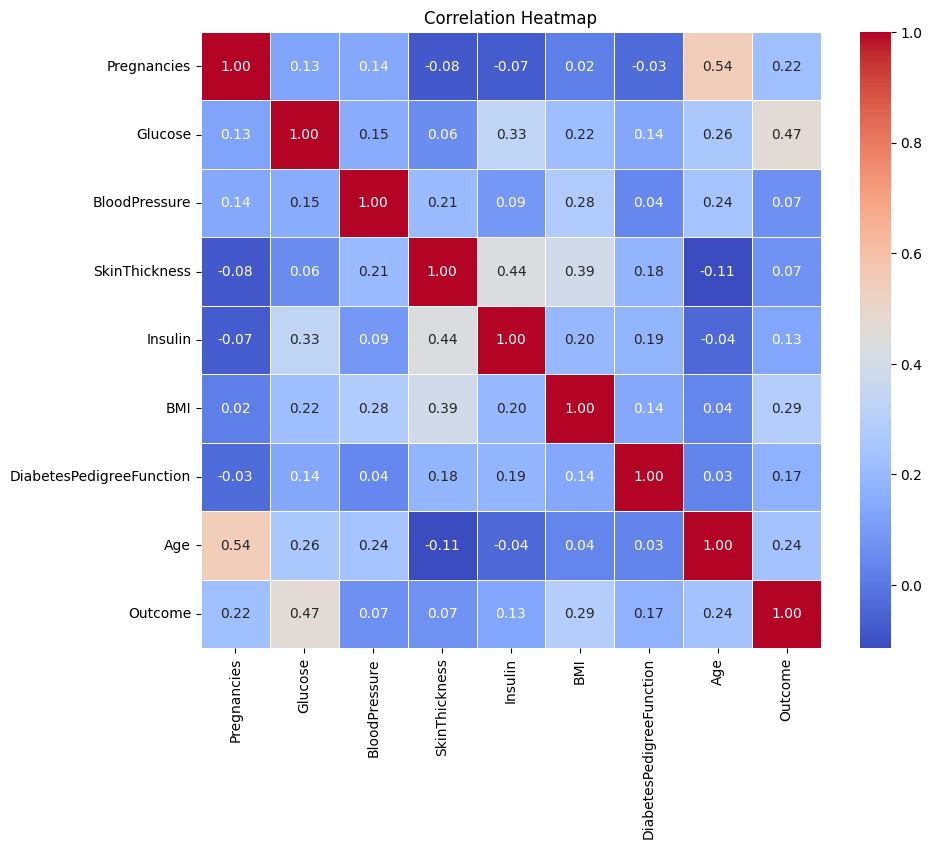

In [51]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm",linewidths=0.5,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Nulls and duplicated

In [14]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#Preparing for the model

In [15]:
X= df.drop(columns='Outcome')
y=df['Outcome']

In [16]:
X.shape

(768, 8)

In [21]:
y.shape

(768,)

#Splitting the data set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Logistic regression

In [18]:
model= LogisticRegression()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print("accuracy score: ",accuracy_score(y_test, y_predict))


accuracy score:  0.7402597402597403


In [20]:
print("classification report:", classification_report(y_test, y_predict))

classification report:               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



#Decision tree with some fine tuning

In [21]:
model= DecisionTreeClassifier(max_depth= 250, min_samples_split=2, max_features= 3)
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

In [22]:
print("accuracy score: ",accuracy_score(y_test, y_predict))

print("classification report:", classification_report(y_test, y_predict))

accuracy score:  0.6753246753246753
classification report:               precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.54      0.56      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



In [23]:
model= DecisionTreeClassifier(max_depth= 250, min_samples_split=2, max_features= 2)
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

In [24]:
print("accuracy score: ",accuracy_score(y_test, y_predict))

print("classification report:", classification_report(y_test, y_predict))

accuracy score:  0.7207792207792207
classification report:               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



#Decision tree without fine tuning

In [25]:
model= DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

In [26]:
print("accuracy score: ",accuracy_score(y_test, y_predict))
print("classification report:", classification_report(y_test, y_predict))

accuracy score:  0.7597402597402597
classification report:               precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154



#XGB

In [27]:
model= XGBClassifier()
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification report:", classification_report(y_test, y_predict))

Accuracy: 0.7207792207792207
Classification report:               precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154



#Grid search


In [33]:
logistic_param= {"C": [0.1, 5, 10]}
logistic_grid= GridSearchCV(LogisticRegression(max_iter= 500),logistic_param,cv=5, scoring='accuracy' ,n_jobs= 5  )
logistic_grid.fit(X_train, y_train)
print("best parameters for logistic regression: ", logistic_grid.best_params_)
print("Best accuracy: ", accuracy_score(y_test, logistic_grid.best_estimator_.predict(X_test)))

best parameters for logistic regression:  {'C': 5}
Best accuracy:  0.7467532467532467


In [36]:
DecisionTree_param= {"max_depth": [5,50,100,250], "min_samples_split":[2,5,8]}

DecisionTree_grid= GridSearchCV(DecisionTreeClassifier(), DecisionTree_param, cv= 5, scoring="accuracy", n_jobs= 1 )
DecisionTree_grid.fit(X_train, y_train)
print("Best hyperparameters for Decision Tree Classifier:", DecisionTree_grid.best_params_ )
print("Best accuracy score:", accuracy_score(y_test, DecisionTree_grid.best_estimator_.predict(X_test)))

Best hyperparameters for Decision Tree Classifier: {'max_depth': 5, 'min_samples_split': 5}
Best accuracy score: 0.7922077922077922


#Removing columns with least relationship with y

In [39]:
X= df.drop(columns=['Outcome','SkinThickness',"BloodPressure"])
y=df['Outcome']

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2 ,random_state= 42)

In [43]:
logistic_param= {"C": [0.1, 5, 10]}
logistic_grid= GridSearchCV(LogisticRegression(max_iter= 500),logistic_param,cv=5, scoring='accuracy' ,n_jobs= 5  )
logistic_grid.fit(X_train, y_train)
print("best parameters for logistic regression: ", logistic_grid.best_params_)
print("Best accuracy: ", accuracy_score(y_test, logistic_grid.best_estimator_.predict(X_test)))

best parameters for logistic regression:  {'C': 0.1}
Best accuracy:  0.7402597402597403


In [44]:
DecisionTree_param= {"max_depth": [5,50,100,250], "min_samples_split":[2,5,8]}

DecisionTree_grid= GridSearchCV(DecisionTreeClassifier(), DecisionTree_param, cv= 5, scoring="accuracy", n_jobs= 1 )
DecisionTree_grid.fit(X_train, y_train)
print("Best hyperparameters for Decision Tree Classifier:", DecisionTree_grid.best_params_ )
print("Best accuracy score:", accuracy_score(y_test, DecisionTree_grid.best_estimator_.predict(X_test)))

Best hyperparameters for Decision Tree Classifier: {'max_depth': 5, 'min_samples_split': 2}
Best accuracy score: 0.7857142857142857
